___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## André Neustein

## Carla Gaieski

## Ester Quintino

___

Definir o preço de uma casa, de acordo com suas características

___

## INTRODUÇÃO

       O projeto 3 visa realização de quatro modelos preditivos para estimar uma variável-alvo, a partir de outras variáveis explicativas a partir de um tema.
       Assim, para a execução do projeto, primeiramente uma base de dados foi escolhida no site Kraggle. Após uma filtragem nas possibilidades, a base escolhida foi "House Sales in King County, USA", que trata dos preços das casas, no distrito de Washington, de acordo com suas características. Assim, o dataframe contêm informações como: o prego da residêcnia, quantos quartos, andares, metros quadrados de construção e metros quadrados total de terreno a casa tem, além de quantos banheiros por quarto, ano de construção, condição do estabelecimento, cep, ano de construção, número de visitas ja feita e se há vista para lago/mar, entre outros.
       Analisando as informações disponíveis, foi determinado que o bjetivo do projeto era prever o preço de uma casa, em King country, de acordo com as suas carascterísticas. Encontrando artigos e notícias sobre o assunto, percebemos que o preco de residências no Estsdo, mas principalmente em metrópoles,como Seatle, sofreu altas mudanças nos anos passado. E o ano de 2017  terminou como o o ano mais caro na hitória.
   https://www.seattletimes.com/business/real-estate/king-county-housing-market-kicks-off-2018-even-hotter-than-before-as-seattle-breaks-price-record/
   https://www.seattletimes.com/business/real-estate/as-home-prices-hit-new-highs-cost-of-living-overtakes-traffic-as-worst-part-of-living-in-seattle-area/
   https://www.seattletimes.com/business/real-estate/million-dollar-home-sales-surge-in-king-county-creeping-into-cheaper-neighborhoods/
   https://pdfs.semanticscholar.org/fd8d/467b219e71ad68f1334a1d9614be16ba6ab0.pdf
   https://www.sciencedirect.com/science/article/pii/S0094119005000537
   http://journals.sagepub.com/doi/pdf/10.1080/0042098042000214806

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

    A base de dados coletada contêm as informações: 
        Id - notação da casa
        *date - data de venda da casa
        *price - preço
        *bedrooms - número de quartos por casa
        *bathrooms - número de banheiros por quartos
        *sqft_living - pé quadrado da casa
        *sqft_lot - pé quadrado do lote
        *floors - número total de andares
        *waterfront - vista para água (lago, rios, mar)
        view - foi vista
        *condition - quão boa está a condição, em geral
        *grade - nota geral dada, com base no sistema de notas de King Country
        sqft_above - pé quadrado sem porão
        sqft_basement - pé quadrado com o porão
        *yr_built - ano de construção
        *yr_renovated - ano de renovação
        *zipcode - CEP
        lat - latitude
        long - longitude
        sqft_living15 - área da sala em 2015
        sqft_lot15 - área do lote em 2015
        
     Assim, o dataframe será filtrado para que permanecam somentes as variáves que nos insteressam para a análise, que são as indicadas com "*"
        

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Carla Kim\Desktop\CD\DP\PROJETO3


### BASE DE DADOS

In [3]:
#leitura da base de dados
casa = pd.read_csv('housesalesprediction.zip', compression='zip', header=0, sep=',', quotechar='"')
casa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#modificando o dataframe para conter as variaveis que nos interessam e romovendo os "Nan" existentes
dados = casa.loc [:, ["date","price", "bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","condition","grade","yr_built","yr_renovated","zipcode"]]
dados.dropna().head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955,0,98178
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,1991,98125
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,0,98028
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,0,98136
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,0,98074


In [89]:
#criando categorias
dados['waterfront']=dados['waterfront'].astype('category')
dados['waterfront'].cat.categories = (['Não','Sim'])
dados.head()

dados['condition']= dados['condition'].astype('category')
dados['condition'].cat.categories = ('Ruim','Satisfatório', 'Ok', 'Bom', 'Excelente')

def grading(dados):
    x=dados['grade']
    if x<=2: return 1
    elif x<=4: return 2
    elif x<=6: return 3
    elif x==7: return 4
    elif x<=9: return 5
    elif x<=11: return 6
    elif x<=13: return 7
    return 8

grade=dados.apply(grading,axis=1)
dados['grade']=grade
dados.grade=dados.grade.astype('category')
dados.grade.cat.categories=(['Péssimo','Muito Ruim','Ruim','Ok','Bom','Muito Bom', 'Excelente'])

#df['grade']= df['grade'].astype('grade')
#df['grade'].cat.categories = ('Péssimo','Muito Ruim', 'Ruim', 'OK', 'Bom', 'Muito Bom', 'Incrível', 'Excelente')

TypeError: ("'<=' not supported between instances of 'str' and 'int'", 'occurred at index 0')

In [76]:
#descrição do preço das casas
dados['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

### ANÁLISE DESCRITIVA

Porcentagem de casas de acordo com sua condição:

In [77]:
dados['condition'].value_counts(True)*100

Ok              64.919262
Bom             26.275852
Excelente        7.870263
Satisfatório     0.795817
Ruim             0.138805
Name: condition, dtype: float64

Porcentagem quartos:

In [78]:
dados['bedrooms'].value_counts(True)*100

3     45.454125
4     31.841947
2     12.770092
5      7.407579
6      1.258502
1      0.920742
7      0.175820
8      0.060149
0      0.060149
9      0.027761
10     0.013881
11     0.004627
33     0.004627
Name: bedrooms, dtype: float64

Porcentagem casas com vista para água:

In [79]:
dados['waterfront'].value_counts(True)*100

Não    99.245824
Sim     0.754176
Name: waterfront, dtype: float64

Porcentagem de nota atrubiída às casas:

In [80]:
dados['grade'].value_counts(True)*100

Ok            41.553695
Bom           40.174895
Ruim          10.549206
Muito Bom      7.092953
Excelente      0.476565
Muito Ruim     0.148059
Péssimo        0.004627
Name: grade, dtype: float64

"grade" varia de 1 a 13, e tem media de 7,65

Porcentagem das casas de acordo com a quantidade de andares: aqui, perce-be que há valores não inteiros, que podem indicar....

In [81]:
dados['floors'].value_counts(True)*100

1.0    49.414704
2.0    38.129829
1.5     8.837274
3.0     2.836256
2.5     0.744922
3.5     0.037015
Name: floors, dtype: float64

In [82]:
dados['yr_renovated'].value_counts(True)*100

0       95.771064
2014     0.421043
2013     0.171193
2003     0.166566
2000     0.161940
2007     0.161940
2005     0.161940
2004     0.120298
1990     0.115671
2006     0.111044
2009     0.101791
1989     0.101791
2002     0.101791
1991     0.092537
2001     0.087910
1998     0.087910
1994     0.087910
1993     0.087910
1987     0.083283
1983     0.083283
1984     0.083283
2010     0.083283
2008     0.083283
1986     0.078656
1985     0.078656
1999     0.078656
1992     0.078656
2015     0.074030
1995     0.074030
1996     0.069403
          ...    
1975     0.027761
1978     0.027761
1981     0.023134
1964     0.023134
1965     0.023134
1958     0.023134
1973     0.023134
1969     0.018507
1972     0.018507
1960     0.018507
1963     0.018507
1956     0.013881
1945     0.013881
1974     0.013881
1953     0.013881
1955     0.013881
1976     0.013881
1957     0.013881
1962     0.009254
1950     0.009254
1967     0.009254
1946     0.009254
1971     0.009254
1940     0.009254
1954     0

95% das casas construídas não foram renovadas em nenhum ano

In [83]:
#crosstab entre a condição da casa e ano de cosnrução
ct1 = pd.crosstab(dados['condition'], dados['yr_built'])
ct1.head()

yr_built,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
condition,,,,,,,,,,,,,,,,,,,,,
Ruim,2,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Satisfatório,2,0,0,1,0,1,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Ok,44,13,15,28,21,38,34,33,35,36,...,450,417,366,229,143,130,170,201,559,38
Bom,26,9,7,10,12,12,36,21,29,38,...,4,0,1,1,0,0,0,0,0,0
Excelente,13,6,5,7,12,23,16,11,20,20,...,0,0,0,0,0,0,0,0,0,0


As condições das casas variam 1 a 5, sendo 1 a mais pior condição e 5 a melhor. Dessa forma, percebe-se que a maiora das casas, ao longo dos anos, permaneceram com uma moda de nota 3 de condição. Somente as casas construídas nos anos de 1900 a 1909, que houve mais divergências na condição. No entanto, percebe-se que o número de casas era muito menor do que no século XXI. Mas houve uma diminução na construção de casas, visto em 2015. Esse fato se deve pela alta quantidade de casas a venda, que o Estado sofreu efeitos do efeito da blha imobiliária. Assim, havia beiza demanda e muita oferta.

In [84]:
#crosstab entre a condição da codição e vista para água
ct2 = pd.crosstab(dados['condition'], dados['waterfront'])
ct2

waterfront,Não,Sim
condition,,
Ruim,29,1
Satisfatório,171,1
Ok,13940,91
Bom,5629,50
Excelente,1681,20


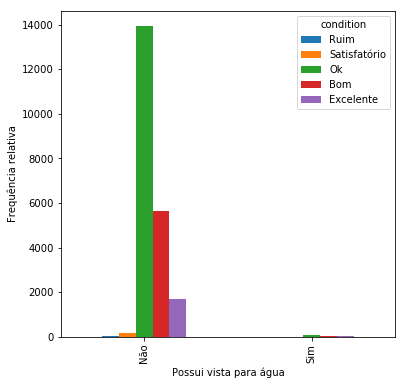

In [85]:
ct2.T.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Frequência relativa')
plt.xlabel('Possui vista para água')
plt.show()

In [86]:
#crosstab entre a condição da codição e vista para água
ct3 = pd.crosstab(dados['condition'], dados['grade'])
ct3

grade,Péssimo,Muito Ruim,Ruim,Ok,Bom,Muito Bom,Excelente
condition,,,,,,,
Ruim,1,1,20,6,2,0,0
Satisfatório,0,6,74,75,15,2,0
Ok,0,14,1135,5234,6310,1253,85
Bom,0,10,769,2833,1840,212,15
Excelente,0,1,282,833,516,66,3


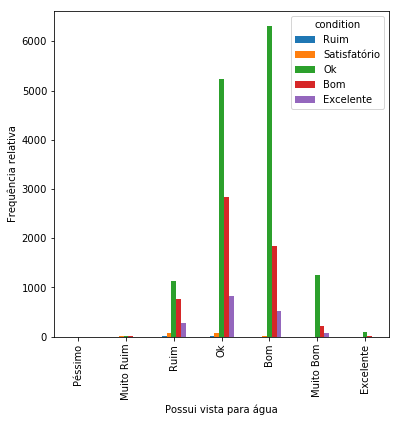

In [87]:
ct3.T.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Frequência relativa')
plt.xlabel('Possui vista para água')
plt.show()

Como já visto, as casas possuem uma moda de condição nota 3 que é o equivalente a "ok". O gráfico acima 

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS